In [1]:
import requests
from datetime import datetime, timezone
import matplotlib.pyplot as plt

In [2]:
response = requests.get("https://api.binance.com/api/v3/klines?symbol=ETHUSDT&interval=1d&limit=100")
data_json = response.json()

In [3]:
def convert_klines(json_data, kline_count):
    result = []

    for candle in json_data[:kline_count]:
        open_time = open_time = datetime.fromtimestamp(candle[0] / 1000, tz=timezone.utc).strftime('%d-%m-%Y')
        open_price = float(candle[1])
        close_price = float(candle[4])
        volume = float(candle[5])

        candle_dict = {
            'open_time': open_time,
            'open': open_price,
            'close': close_price,
            'volume': volume,
        }

        result.append(candle_dict)
    return result

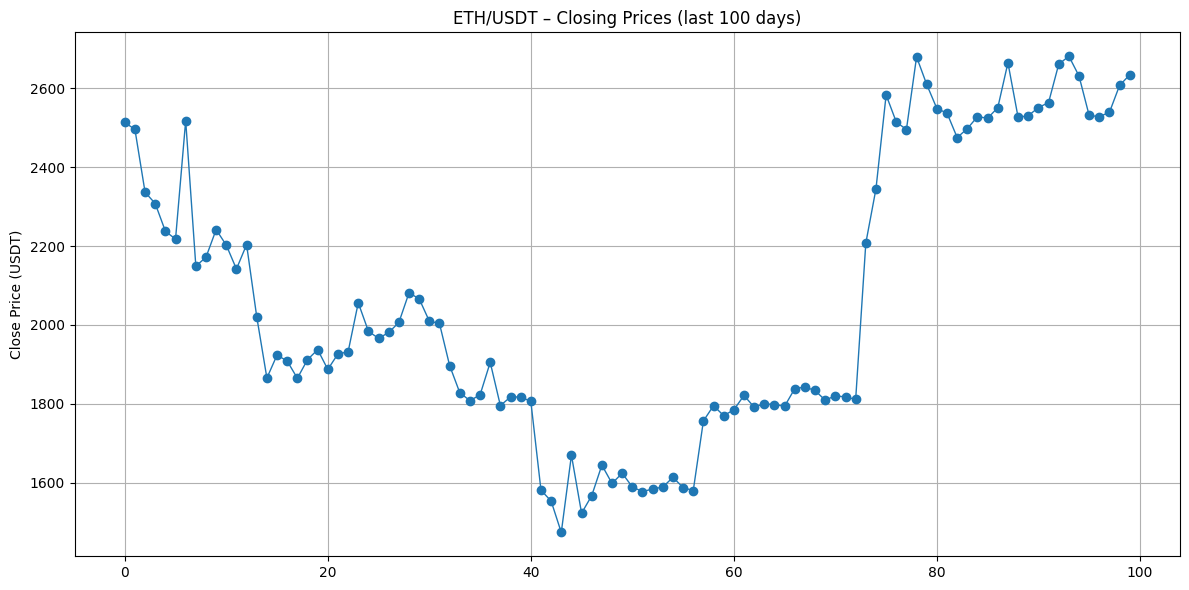

In [10]:
data = convert_klines(data_json, 100)

dates = [item['open_time'] for item in data]
close_prices = [item['close'] for item in data]

plt.figure(figsize=(12, 6))
plt.plot(close_prices, marker='o', linestyle='-', linewidth=1)

plt.title('ETH/USDT – Closing Prices (last 100 days)')
plt.ylabel('Close Price (USDT)')
plt.grid('True')
plt.tight_layout()
plt.show()